In [365]:
!pip install tensorflow numpy pandas matplotlib scikit-learn

In [366]:
import tensorflow as tf
print(tf.__version__)  

2.19.0


In [367]:
import pandas as pd
import numpy as np

# Define dataset URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Define column names
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Read dataset from URL
dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

# Display last few rows of the dataset
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [368]:
# Display last few rows of the dataset
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [369]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [370]:
# Drop missing values
dataset = dataset.dropna()


In [371]:
# Statistical summary of the dataset
print(dataset.describe())


              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [372]:
print(dataset.columns)



Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')


In [373]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='Origin')


In [374]:
dataset['Origin_1'] = dataset['Origin_1'].astype(int)
dataset['Origin_2'] = dataset['Origin_2'].astype(int)
dataset['Origin_3'] = dataset['Origin_3'].astype(int)
# men boolean la int 

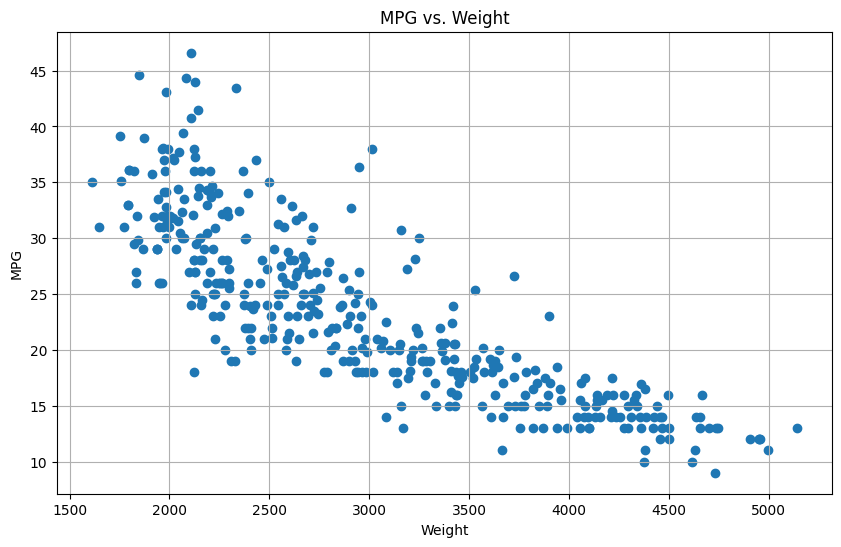

In [375]:
import matplotlib.pyplot as plt

# MPG vs. Weight
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Weight'], dataset['MPG'])
plt.title('MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


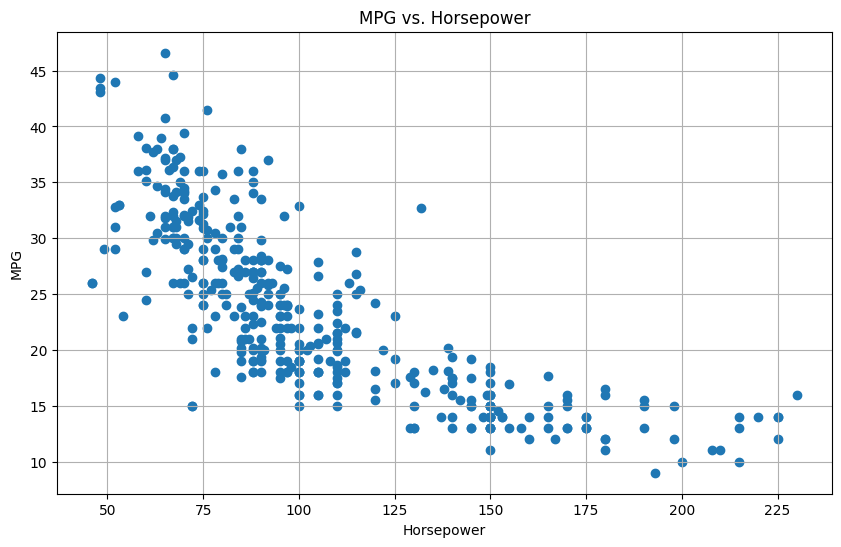

In [376]:
# MPG vs. Horsepower
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Horsepower'], dataset['MPG'])
plt.title('MPG vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


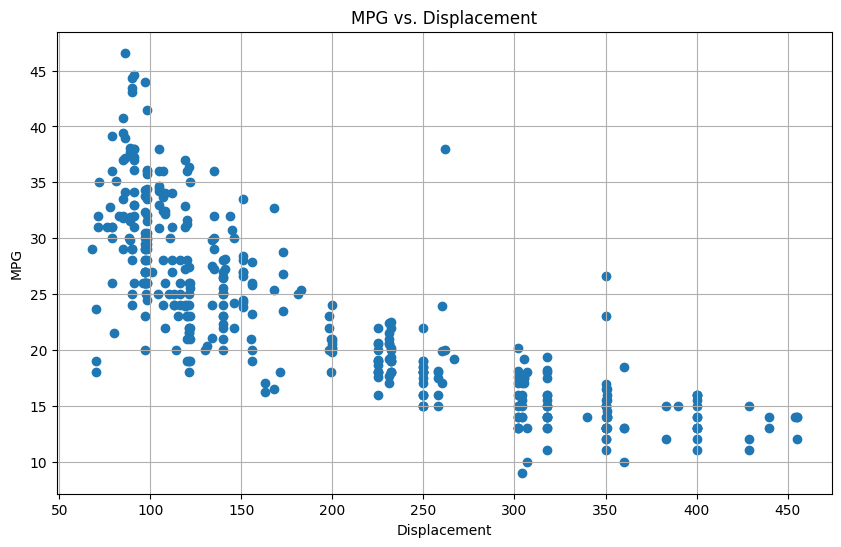

In [377]:

# MPG vs. Displacement
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Displacement'], dataset['MPG'])
plt.title('MPG vs. Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


In [378]:
correlation_matrix = dataset.corr()

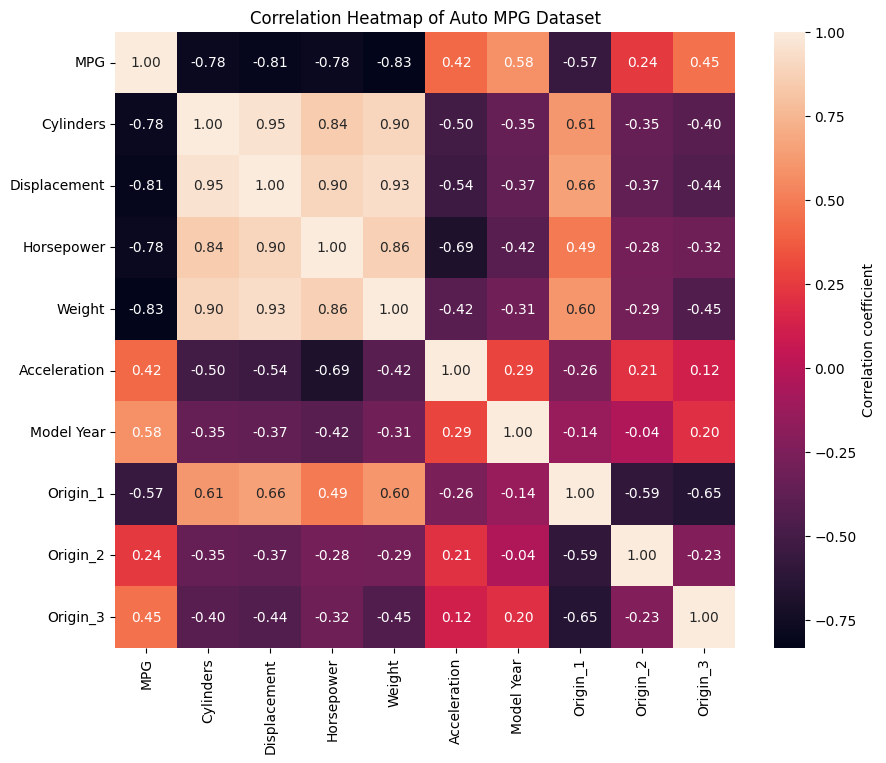

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create the heatmap, add annotations and a color map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",  cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap of Auto MPG Dataset')
plt.show()


In [380]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = dataset.drop('MPG', axis=1)  # (labels ) All other columns are features
y = dataset['MPG']  # MPG is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #l seed value kermel zet l split kel marra


In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that standardizes the data then applies linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model to the training data
model = pipeline.fit(X_train, y_train)


In [382]:
# Training score
train_score = model.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")

# Test score
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score:.4f}")


Training Score: 0.8287
Test Score: 0.7923


In [412]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


In [413]:
# Sélection des caractéristiques
X = dataset[['Weight', 'Horsepower', 'Displacement', 'Cylinders', 'Acceleration']]
y = dataset['MPG']

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [415]:
# Définition du modèle
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),  # 1ère couche
    Dropout(0.2),  # Désactive 20% des neurones
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # 2ème couche
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # 3ème couche
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # 4ème couche
    Dense(1, activation='linear')  # Sortie linéaire pour la régression
])


In [416]:
# Compiler le modèle avec Adam et un learning rate ajusté
optimizer = Adam(learning_rate=0.0007)
model.compile(loss='mean_squared_error', optimizer=optimizer)


In [417]:
# Entraîner le modèle
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=20, validation_split=0.2)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 592.6617 - val_loss: 622.6547
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 496.6057 - val_loss: 460.2764
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 345.6754 - val_loss: 163.4737
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.9533 - val_loss: 67.4413
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.0891 - val_loss: 50.6235
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.4096 - val_loss: 40.1988
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.0553 - val_loss: 33.9892
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.3125 - val_loss: 30.2018
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.5422 - val_loss: 27.1434
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.2552 - val_loss: 24.5837
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.9365 - val_loss: 23.0382
Epoch 12/100
13/13 ━━━━━━━━━━━━━

In [418]:
# Faire des prédictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calcul du R² Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Training Score (R²): {train_r2:.4f}")
print(f"Test Score (R²): {test_r2:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training Score (R²): 0.7989
Test Score (R²): 0.6790


In [419]:
# Évaluer le modèle sur les données de test
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.3382
Test Loss: 18.3626


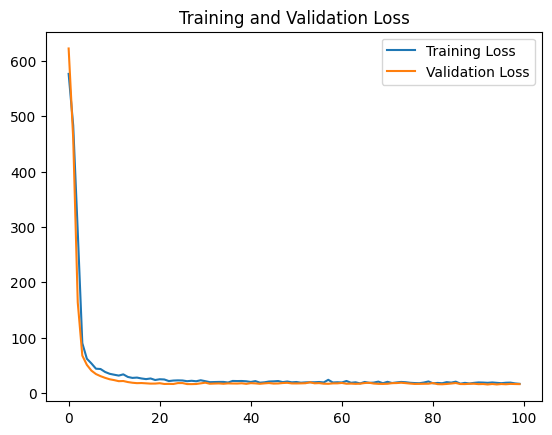

In [420]:
import matplotlib.pyplot as plt

# Tracer la perte d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [421]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,  # Nombre d'époques à attendre après amélioration
    restore_best_weights=True)  # Restaure les meilleurs poids

# Inclure dans la méthode fit
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.5141 - val_loss: 15.4284
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.2361 - val_loss: 19.0084
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.3504 - val_loss: 15.1417
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.5422 - val_loss: 16.6985
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0840 - val_loss: 15.3976
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8464 - val_loss: 15.3871
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.1981 - val_loss: 15.9116
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5726 - val_loss: 15.4597
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3857 - val_loss: 16.5560
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0642 - val_loss: 15.7859
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.2619 - val_loss: 16.4573
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [422]:
from sklearn.metrics import r2_score

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calcul du R² Score (coefficient de détermination)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Training Score (R²): {train_r2:.4f}")
print(f"Test Score (R²): {test_r2:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training Score (R²): 0.7998
Test Score (R²): 0.6774


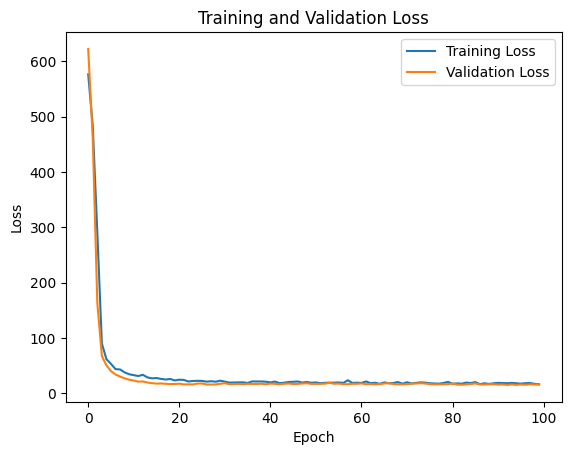

In [423]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
